In [2]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
import os
base_dir = '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/'
os.makedirs(base_dir, exist_ok=True)
#'airport_terminal', 'aquarium'
categories = ['beach', 'bar', 'music_studio']

# Loop through categories to extract only required directories into base_dir
for category in categories:
    category_path = f"data_256/a/{category}/*"
    print(f"Extracting {category}...")
    !wget -qO- http://data.csail.mit.edu/places/places365/train_256_places365standard.tar | tar -xvf - --wildcards '{category_path}' -C {base_dir}

# Step 4: Verify if the files were stored correctly
print("Verifying the extracted files...")

# List the contents of the base directory
for category in categories:
    category_dir = os.path.join(base_dir, category)
    print(f"Contents of {category_dir}:")
    !ls {category_dir}


Extracting beach...
^C
Extracting bar...
^C
Extracting music_studio...
^C
Verifying the extracted files...
Contents of /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/beach:
ls: cannot access '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/beach': No such file or directory
Contents of /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/bar:
ls: cannot access '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/bar': No such file or directory
Contents of /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/music_studio:
ls: cannot access '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/music_studio': No such file or directory


In [5]:
!mv /content/data_256/a/ /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data/

mv: cannot stat '/content/data_256/a/': No such file or directory


In [ ]:
# Test
base_dir = '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/'

# Ensure the directory exists
os.makedirs(base_dir, exist_ok=True)

#!wget -O {base_dir}places365standard_easyformat.tar http://data.csail.mit.edu/places/places365/places365standard_easyformat.tar

categories = ['airport_terminal', 'aquarium', 'beach', 'bar', 'music_studio']
for category in categories:
    os.makedirs(f"{base_dir}{category}", exist_ok=True)

# Extract airport_terminal
!tar -xvf {base_dir}places365standard_easyformat.tar -C {base_dir}airport_terminal --strip-components=3 places365_standard/val/airport_terminal
# Extract aquarium
!tar -xvf {base_dir}places365standard_easyformat.tar -C {base_dir}aquarium --strip-components=3 places365_standard/val/aquarium
# Extract beach
!tar -xvf {base_dir}places365standard_easyformat.tar -C {base_dir}beach --strip-components=3 places365_standard/val/beach
# Extract bar
!tar -xvf {base_dir}places365standard_easyformat.tar -C {base_dir}bar --strip-components=3 places365_standard/val/bar
# Extract music_studio
!tar -xvf {base_dir}places365standard_easyformat.tar -C {base_dir}music_studio --strip-components=3 places365_standard/val/music_studio

#!rm -f {base_dir}places365standard_easyformat.tar

tar: /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/places365standard_easyformat.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/places365standard_easyformat.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/places365standard_easyformat.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/places365standard_easyformat.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: /content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/places365standard_easyformat.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
train_data_dir = '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/train_data'
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data/'

In [5]:

import os

def count_files_in_dir(directory):
    class_counts = {}

    # Iterate through subdirectories (classes)
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        # Check if it's a directory (i.e., a class folder)
        if os.path.isdir(subdir_path):
            # Count number of files in the subdirectory
            file_count = len(os.listdir(subdir_path))
            class_counts[subdir] = file_count

    return class_counts

# Directories
train_data_dir = '/content/data_256/a/'
test_data_dir = '/content/drive/MyDrive/ColabNotebooks/ComputerVision_AIPI590/data/test_data'

# Count files in train and test directories
train_class_counts = count_files_in_dir(train_data_dir)
test_class_counts = count_files_in_dir(test_data_dir)

# Print counts for train data
print("Train Data Class Counts:")
for class_name, count in train_class_counts.items():
    print(f"Class: {class_name}, Count: {count}")

# Print counts for test data
print("\nTest Data Class Counts:")
for class_name, count in test_class_counts.items():
    print(f"Class: {class_name}, Count: {count}")



Train Data Class Counts:
Class: airport_terminal, Count: 5000
Class: aquarium, Count: 5000

Test Data Class Counts:
Class: airport_terminal, Count: 100
Class: aquarium, Count: 100
Class: beach, Count: 100
Class: bar, Count: 100
Class: music_studio, Count: 100


In [ ]:
from collections import Counter
from torch.utils.data import Dataset
import glob
import cv2
import torch
from torchvision import transforms
import os

class Scenes(Dataset):
    def __init__(self, folder):
        # Define class folder names
        self.class_folders = ['airfield', 'alley', 'aiport_cabin', 'aiport_terminal', 'amphitheater']

        # Initialize file paths and class labels
        self.fpaths = []
        self.targets = []

        # Loop through each class folder
        for class_name in self.class_folders:
            class_path = os.path.join(folder, class_name, '*.jpg')
            class_files = glob.glob(class_path)

            # Print debug information
            print(f"Found {len(class_files)} images in {class_name} folder.")

            # Limit to 500 images per class
            #class_files = class_files[:500]

            # Append file paths and assign class labels
            self.fpaths.extend(class_files)
            self.targets.extend([self.class_folders.index(class_name)] * len(class_files))

        # Shuffle the file paths and corresponding targets
        from random import shuffle, seed
        seed(10)
        combined = list(zip(self.fpaths, self.targets))
        shuffle(combined)
        self.fpaths, self.targets = zip(*combined)

        # Define normalization transform
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    def __len__(self):
        return len(self.fpaths)

    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = cv2.imread(f)[:, :, ::-1]  # Convert BGR to RGB
        im = cv2.resize(im, (224, 224))
        im = torch.tensor(im / 255)
        im = im.permute(2, 0, 1)  # Reorder dimensions to (channels, height, width)
        im = self.normalize(im)
        return im.float().to(device), torch.tensor([target]).float().to(device)

    def class_distribution(self):
        # Count the number of images in each class using the targets
        counter = Counter(self.targets)

        # Print the class distribution based on indices in self.class_folders
        for class_idx, class_name in enumerate(self.class_folders):
            print(f"Class: {class_name}, Count: {counter[class_idx]}")

# Example usage
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/ComputerVision_AIPI590/data/data_256/a/'
dataset = Scenes(train_data_dir)

# Check class distribution
dataset.class_distribution()


Found 5000 images in airfield folder.
Found 0 images in alley folder.
Found 0 images in aiport_cabin folder.
Found 0 images in aiport_terminal folder.
Found 0 images in amphitheater folder.
Class: airfield, Count: 500
Class: alley, Count: 0
Class: aiport_cabin, Count: 0
Class: aiport_terminal, Count: 0
Class: amphitheater, Count: 0


In [ ]:
from collections import Counter
from torch.utils.data import Dataset
import glob
import cv2
import torch
from torchvision import transforms
import os

class Scenes(Dataset):
    def __init__(self, folder):
        # Define class folder names
        self.class_folders = ['airfield', 'alley', 'aiport_cabin', 'aiport_terminal', 'amphitheater']

        # Initialize file paths and class labels
        self.fpaths = []
        self.targets = []

        # Loop through each class folder
        for class_name in self.class_folders:
            class_path = os.path.join(folder, class_name, '*.jpg')
            class_files = glob.glob(class_path)

            # Limit to 500 images per class
            class_files = class_files[:500]

            # Append file paths and assign class labels
            self.fpaths.extend(class_files)
            self.targets.extend([self.class_folders.index(class_name)] * len(class_files))

        # Shuffle the file paths and corresponding targets
        from random import shuffle, seed
        seed(10)
        combined = list(zip(self.fpaths, self.targets))
        shuffle(combined)
        self.fpaths, self.targets = zip(*combined)

        # Define normalization transform
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    def __len__(self):
        return len(self.fpaths)

    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = cv2.imread(f)[:, :, ::-1]  # Convert BGR to RGB
        im = cv2.resize(im, (224, 224))
        im = torch.tensor(im / 255)
        im = im.permute(2, 0, 1)  # Reorder dimensions to (channels, height, width)
        im = self.normalize(im)
        return im.float().to(device), torch.tensor([target]).float().to(device)

    def class_distribution(self):
        # Count the number of images in each class using the targets
        counter = Counter(self.targets)

        # Print the class distribution based on indices in self.class_folders
        for class_idx, class_name in enumerate(self.class_folders):
            print(f"Class: {class_name}, Count: {counter[class_idx]}")


In [ ]:
train_data = Scenes(train_data_dir)
train_data.class_distribution()

Class: airfield, Count: 500
Class: alley, Count: 0
Class: aiport_cabin, Count: 0
Class: aiport_terminal, Count: 0
Class: amphitheater, Count: 0


In [ ]:
train_data = Scenes(train_data_dir)
print(len(train_data))

test_data = Scenes(test_data_dir)
print(len(test_data))


500
200


tensor([0.], device='cuda:0')


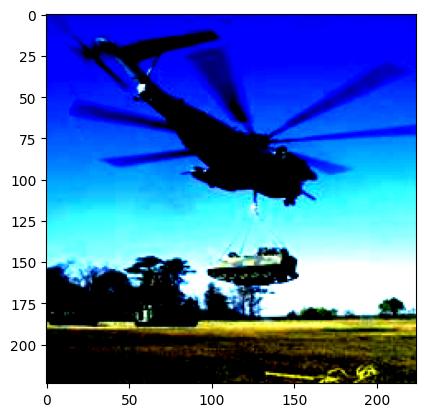

In [ ]:
im, label = train_data[10]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

tensor([4.], device='cuda:0')


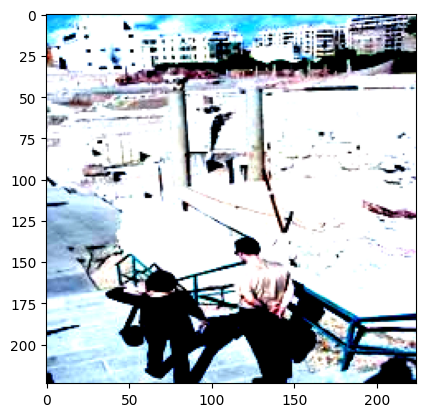

In [ ]:
im, label = test_data[100]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def get_model():
    model = models.resnet50(pretrained=True)

    # Freeze the parameters in the feature extractor layers
    for param in model.parameters():
        param.requires_grad = False

    # Update the average pooling layer
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))

    # Update the fully connected layer (classification head)
    # The input to the Linear layer should be 2048, not 512
    model.fc = nn.Sequential(
        nn.Flatten(),
        nn.Linear(2048, 128),   # Update input size to 2048
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 1),
        nn.Sigmoid()            # Sigmoid for binary classification
    )

    # Binary Cross Entropy Loss for binary classification
    loss_fn = nn.BCELoss()

    # Adam optimizer
    optimizer = optim.Adam(model.fc.parameters(), lr=1e-3)  # Only optimize the new fully connected layers

    return model.to(device), loss_fn, optimizer


In [ ]:
!pip install torch_summary
from torchsummary import summary
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (4,096)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]  

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 256, 56, 56]         --
|    └─Bottleneck: 2-1                   [-1, 256, 56, 56]         --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (4,096)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-7                  [-1, 256, 56, 56]  

In [ ]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [ ]:
def get_data():
    train = Scenes(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = Scenes(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [ ]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(5):
    print(f" epoch {epoch + 1}/5")
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)

 epoch 1/5
 epoch 2/5
 epoch 3/5
 epoch 4/5
 epoch 5/5


<ipython-input-67-1cff15daa435>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


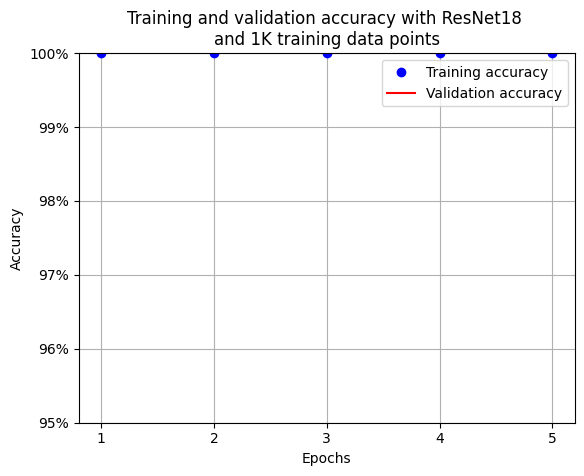

In [ ]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with ResNet18 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()